# Esame Laboratorio di Programmazione II - 27/06/2025


## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [4]:
import numpy as np

arr = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30])

#1)
print("Mean: {}\n".format(np.mean(arr)))

#2)
mean = np.mean(arr)
print("{}\n".format(arr[arr > mean]))

#3)
new_arr = np.where(arr > mean, arr * (1 - 0.10), arr)
print("{}\n".format(new_arr))


Mean: 18.983000000000004

[22.5  31.2  24.9  19.99 27.3 ]

[14.99  20.25   9.75  18.    28.08  12.8   22.41   8.4   17.991 24.57 ]



## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

50 lanci: 0.28
100 lanci: 0.31
150 lanci: 0.31333333333333335
200 lanci: 0.31
250 lanci: 0.332
300 lanci: 0.3566666666666667
350 lanci: 0.35714285714285715
400 lanci: 0.36
450 lanci: 0.36666666666666664
500 lanci: 0.37
550 lanci: 0.3690909090909091
600 lanci: 0.3566666666666667
650 lanci: 0.3553846153846154
700 lanci: 0.35
750 lanci: 0.3466666666666667
800 lanci: 0.35375
850 lanci: 0.35294117647058826
900 lanci: 0.35
950 lanci: 0.34842105263157896
1000 lanci: 0.347


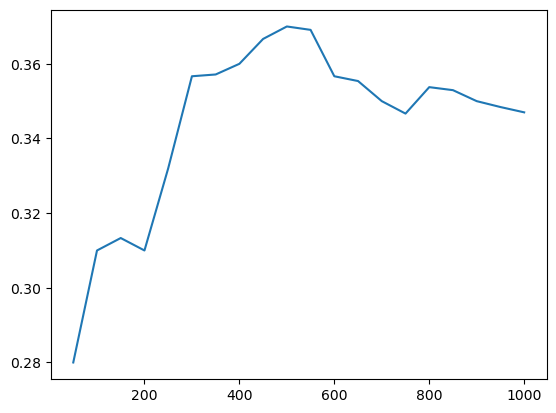

In [11]:

import numpy as np
import matplotlib.pyplot as plt

#1)
probabilities = [2/3, 1/3]
outcomes = [0, 1]

sample = np.random.choice(outcomes, size=1000, p=probabilities)

#2)

def cumulative(sample):

    cumulative_heads = []
    rate = []

    for i in range(1, int(1000 / 50) + 1):
        
        sample_bool = np.where(sample[0:i * 50]  ==  1, True, False)
        value = np.sum(sample_bool)  / len(sample_bool)
        cumulative_heads.append(value)
        rate.append(i * 50)
        print("{} lanci: {}".format(i * 50, value))
    
    return cumulative_heads, rate

#3)

cumulative_heads, rate = cumulative(sample)

plt.plot(rate, cumulative_heads)
plt.show()


## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [15]:
import numpy as np

def mat_normalizzata(mtx):
    mean = np.mean(mtx)
    std = np.std(mtx)

    return (mtx - mean) / std

mtx = np.random.normal(5, 2, size = (6,10))

mat_normalizzata(mtx)

array([[ 0.39352482,  0.30004104, -1.84695673, -0.18664465,  2.15687346,
         0.95287914, -0.1920803 , -2.03713604, -0.37143629,  0.60515873],
       [ 0.92076553,  1.34108955,  0.62529074, -0.33358023, -0.62728244,
        -0.72273225,  1.04772585, -1.17096894, -0.79127481,  0.57274849],
       [-0.12367259, -1.18532663,  1.8689673 ,  0.96023931,  0.99531656,
         0.32372397, -0.7604436 , -0.37248063, -0.52369591, -0.84502777],
       [ 1.5245462 , -1.70105708, -0.11598564, -0.72114674,  0.46036253,
        -1.35458366,  0.60059185, -1.46507828, -0.59924968, -0.72710868],
       [ 1.79059176,  0.13004911,  1.47939355,  0.64278216, -0.39664297,
        -0.61801784,  1.16241789,  1.05790314, -1.1310014 , -0.04995877],
       [-1.46024269,  0.9083771 ,  1.22374537, -0.34592299, -1.34604874,
        -0.64718385,  0.34245463, -0.07231112,  1.12002155, -0.66530138]])

## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


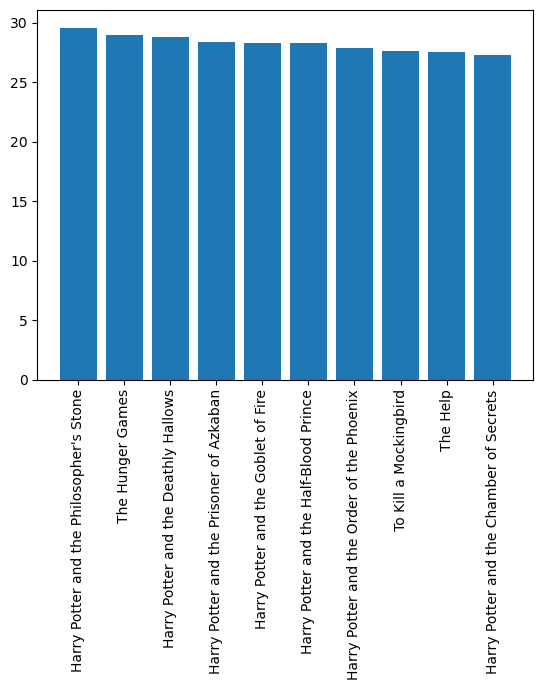

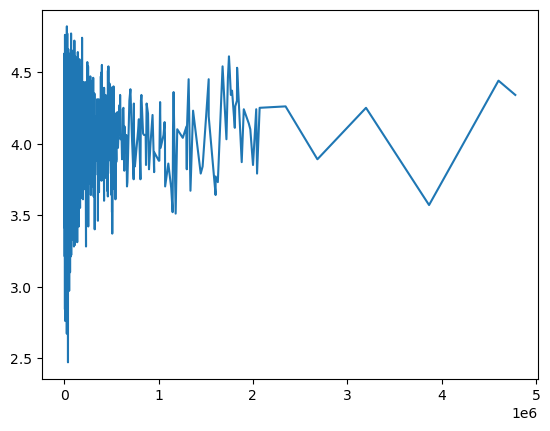

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("books.csv")

#1)
df["engagement_score"] = df["average_rating"] * np.log10(1 + df["ratings_count"])

#2)
mymax = np.max(df["engagement_score"])
df[df["engagement_score"]  ==  mymax]

#3)
df[df["average_rating"] > 4.5]

#4)
top_ten = df.sort_values(by = "engagement_score", ascending = False).head(10)
values = top_ten["engagement_score"]
labels = top_ten["original_title"]

plt.bar(labels, values)
plt.xticks(rotation = 90)
plt.show()

#5)
df_sorted = df.sort_values(by="ratings_count", ascending=True)
ratings_count = df_sorted["ratings_count"]
average_rating = df_sorted["average_rating"]

plt.plot(ratings_count, average_rating)
plt.show()

## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


C:\Users\danie\AppData\Local\Temp\ipykernel_8144\943896385.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode(dropna = True)[0], inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_8144\943896385.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = (filtered_df.groupby(by = ["age_group"]).s

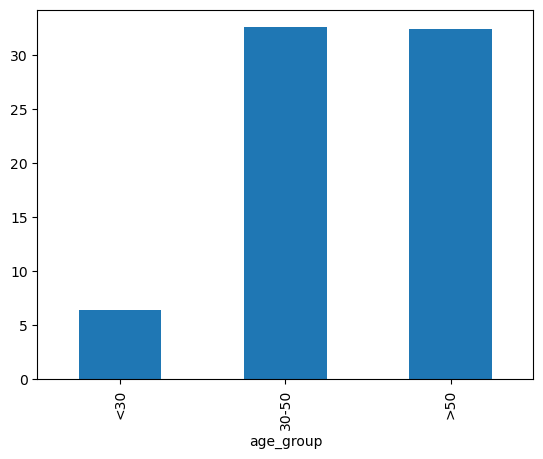

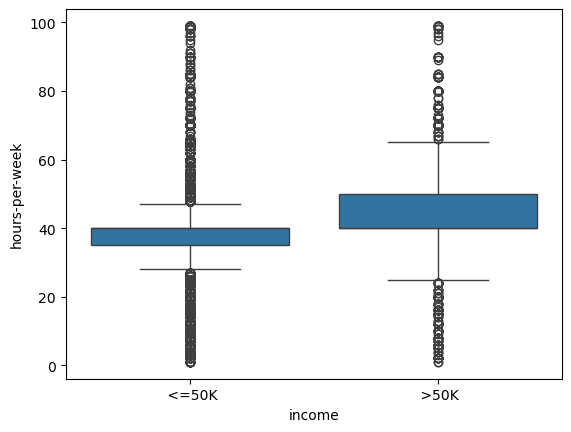

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("adult_con_titoli.csv")

#1)
df.shape

#2)
np.sum(pd.isna(df), axis = 0)

#3)
for col in ["workclass", "occupation", "native-country"]:
    df[col].fillna(df[col].mode(dropna = True)[0], inplace=True)

#4)
df.groupby(by = ["sex"])["age"].mean()

#5)
df.groupby(by = ["sex"])["income"].value_counts(normalize=True) * 100

#6)
df["age_group"] = pd.cut(df["age"], bins = [-np.inf, 30, 50, np.inf], labels = ["<30", "30-50", ">50"])

#7)
filtered_df = df[df["income"]  ==  " >50K"]
grouped_df = (filtered_df.groupby(by = ["age_group"]).size() / df.groupby("age_group").size()) * 100 

grouped_df.plot(kind = "bar")
plt.show()

# --- --- ---

sns.boxplot(data = df, x = "income", y = "hours-per-week")
plt.show()

## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.

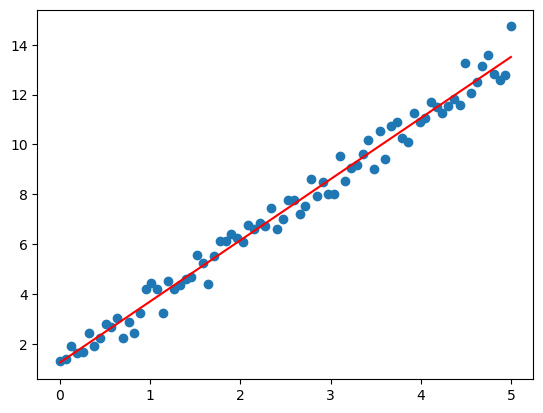

0.45352811425766854

In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

x = np.linspace(0, 5, 80)
y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)

#1)

def linear(x, a, b):
    return a * x + b

popt, pcov = scipy.optimize.curve_fit(linear, x, y)
a_fit , b_fit = popt
y_fit = a_fit * x + b_fit

#2)
plt.scatter(x,y)
plt.plot(x, y_fit, color = "red")
plt.show()

#3)
mean_absolute_error(y, y_fit)
root_mean_squared_error(y, y_fit)